# MAE Optimization LAB 

## March 2022

<div class="alert alert-danger">
Caution: execute the cells sequentially 
<div>

<div class="alert alert-block alert-warning">  Student Name:
    
    - Ronan, Keane:
    
    - Sergio, Martínez:

# Lab2 - Unconstrained Optimization
In this computer lab, we will be interested in analyzing optimization algorithms for solving unconstrained optimization problems. 

The main goal is to implement two well known descent direction algorithms and evaluate their performance on the following minimization functions:
- The cone function : $f_1(x,y) = 2(x + y - 2)^2 + (x - y)^2$.
- The Rosenbrock function : $f_2(x,y) = 100(y - x^2)^2 + (1 - x)^2$.

<p class="bg-primary" style="padding:1em"> **Question 1):** For each of the two functions, find all the stationary points. </p> 

<div class="alert alert-block alert-warning"> Solution: Cone Function - (1,1) and (1,1), both of which are local minima
    Rosenbrock Function - (1,1) and (1,1), both of which are local minima
  </div> 
  

<p class="bg-primary" style="padding:1em"> **Question 2):** Do the functions $f_1$ and $f_2$ admit minima on ${\mathbb R}^2$ ?</p> 

<div class="alert alert-block alert-warning"> Solution: Yes
  </div> 


### Imports:

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

For this lab, we provide the python implementation of the functions $f_1$ and $f_2$, their gradients as well as their Hessian matrices.

In [2]:
def cone(X) : 
    x=X[0]
    y=X[1]
    z= 2*(x+y-2)**2+(x-y)**2
    return np.array([z])
def g_cone(X) : 
    x=X[0]
    y=X[1]
    dzx= 2*(3*x+y-4)
    dzy=2*(x+3*y-4)
    return np.array([dzx,dzy])
def h_cone(X) : 
    return np.array([[6,2],[2,6]])

In [3]:
def rosenbrock(X) : 
    x=X[0]
    y=X[1]
    z= 100*(y-x**2)**2+(1-x)**2
    return np.array([z])
def g_rosenbrock(X) : 
    x=X[0]
    y=X[1]
    dzx= 2*(-1+x+200*x**3-200*x*y)
    dzy=200*(-x**2+y)
    return np.array([dzx,dzy])
def h_rosenbrock(X) : 
    x=X[0]
    y=X[1]
    dzxx=-400*(y-x**2)+800*x**2+2
    dzxy= -400*x
    dzyy=200
    return np.array([[dzxx,dzxy],[dzxy,dzyy]])

## Gradient algorithm
The choice of the descent direction type is a crucial ingredient for any optimization algorithm. Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. The algorithm is given as follows:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">

   ### Gradient descent algorithm
1. **Inputs:** Pick $x_0 \in {\mathbb R}^n $ arbitrarily, $\alpha_0 > 0, \ \epsilon > 0, \  k_{max} \in {\mathbb N}$
2. Set k = 0.
3. $ \ \ \ \ $ Set $d_k = - \nabla f(x_k)$;
4. $ \ \ \ \ $ Find a stepsize $\alpha_k$ satisfying $f(x_k + \alpha_k d_k ) < f(x_k)$.
5. $ \ \ \ \ $ Set $x_{k+1} = x_k + \alpha_k d_k$.
6. $ \ \ \ \ $ Increment k by 1; if a stopping criterion is satisfied, then STOP, otherwise go to Step 3.
    
    
</div>

At this stage of the lab, we set the stepsize $\alpha_k = \alpha_0 = 10^{-3}$ fixed for all the iterations, $ k_{max}=10^4$, and $\epsilon= 10^{-3}$

<p class="bg-primary" style="padding:1em"> **Question 3):**Give one possible stopping criterion (other than the maximum number function evaluations or iterations) for the gradient descent algorithm.</p> 

<div class="alert alert-block alert-warning"> Solution: If the the absolute change between each iteration of xk becomes less than the margin of error (i.e. epilson), then the descent gradient achieves its purpose.
    </div>

<p class="bg-primary" style="padding:1em"> **Question 4):**Complete the Python implementation of the gradient descent algorithm using a fixed stepsize.</p> 

In [34]:
## SOLUTION :


def grad_fixed_step(fobj, fobj_grad, x0, epsilon, kmax, alpha): 
    k=0
    xk=x0
    fk=None
    x_history=[]
    x_history.append(xk)
    while k< kmax :
        
        ### COMPUTE THE DIRECTION dk
         dk = -fobj_grad(xk)
         xk_old = xk
         xk = xk + alpha*dk
    
         x_history.append(xk)
        
         k+=1
            
         ### ADD A STOPPING CRITERION
         if  abs(fobj(xk)-fobj(xk_old))<epsilon: 
            fk=fobj(xk)
            break
        
 ###GRID  for the plots
    def cost_func(x, y):
        try :
            v=np.zeros((len(x),len(y)))
            for i in range(len(x)):
                for j in range(len(y)): 
                    v[i,j]= fobj([x[i],y[j]])
        except : 
            v=fobj([x,y])
        return v
    x_grid = np.linspace(-3,3,101)
    y_grid = np.linspace(-3,3,101)
    J_grid = cost_func(x_grid[:],
                       y_grid[:])
    X, Y = np.meshgrid(x_grid, y_grid)

    __, ax = plt.subplots()
    contours = ax.contour(X, Y, J_grid, 50)
    ax.clabel(contours)
    ax.scatter([1]*2,[1]*2,s=[50,10], color=['k','w'])

    for j in range(1,k):
        ax.annotate('', xy=x_history[j], xytext=x_history[j-1],
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                       va='center', ha='center')
    ax.scatter(*zip(*x_history), c='b', s=40, lw=0)

    # Labels, titles and a legend.
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Fixed step')
    # Position the legend by hand so that it doesn't cover up any of the lines.

    plt.show()

        
    return xk,fk,k



<div class="alert alert-block alert-warning"> Solution:  
    </div>

<p class="bg-primary" style="padding:1em"> **Question 5):** Set $\epsilon=10^{-5}$, $k_{\max}=10^4$, $\alpha=10^{-3}$ and $x_0=[0,0]$. Solve the optimization problems $\min_{{\mathbb R}^2} f(x,y)$ for both the `cone` function and the `Rosenbrock` function. 
Comment the obtained results using different starting points $x_0$. </p> 

<div class="alert alert-block alert-warning"> 
    be careful put 
    
    epsilon=1e-5, kmax=1e4, alpha=1e-3
</div>


<div class="alert alert-block alert-warning"> Solution: 
    </div>

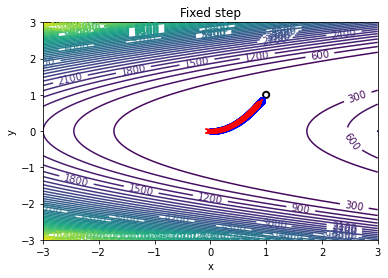

(array([0.92567344, 0.85656036]), array([0.00553411]), 1897)


In [46]:
# CALL HERE THE grad_fixed_step METHOD ON THE CONE AND THE ROSENBROCK PROBLEMS USING DIFFERENT STARTING POINTS.
#to complete grad_fixed_step(....) 
epsilon=1e-5
kmax=1e4
#alpha=1e-3
alpha=2e-3
x0 =[0,0]

print(grad_fixed_step(rosenbrock, g_rosenbrock, x0 ,epsilon ,kmax ,alpha ))


<p class="bg-primary" style="padding:1em"> **Question 6):** What happens if you change the value of the initial stepsize  $\alpha_0$ ? Comment the obtained results.</p> 

<div class="alert alert-block alert-warning"> Solution: 
    </div>

<p class="bg-primary" style="padding:1em"> **Question 7):** Study the influence of changing $k_{max}$ as well as the tolerance $\epsilon$ ? Comment the obtained results. </p> 

<div class="alert alert-block alert-warning"> Solution: 
    </div>

To guarantee a faster convergence for the gradient descent algorithm, we suggest **to replace the fixed stepsize with the optimal one**. In this case, we will refer the obtained algorithm as the gradient descent algorithm with the optimal stepsize.

At each iteration of this algorithm, the stepsize $\alpha_k$ is computed as a solution of the following scalar optimization problem
$$ \min_{\alpha \in {\mathbb R}} f(x_k + {\alpha} d_k) $$

<p class="bg-primary" style="padding:1em"> **Question 8):** Implement the gradient descent algorithm using the optimal stepsize.
Comment the obtained results using different starting points. 
    
Help:  Use the Python module `minimize` to compute the optimal stepsize at each iteration. See the link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
</p>    

In [9]:
## SOLUTION :

def grad_opt_step(fobj, fobj_grad,x0, epsilon, kmax, alpha): 
    k=0
    xk=x0
    fk=None
    x_history=[]
    x_history.append(xk)
    while k< kmax :
            
        ### COMPUTE THE DIRECTION dk
        # dk= ...
        # xk_old=xk
        ### COMPUTE alpha_opt USING opt.minimize on the function phi(alpha)= f(xk + alpha * dk)
        #def phi(alpha)
        #return ....
        # alpha_opt= ...
        # xk= ...
        x_history.append(xk)
       
        k+=1
        
        ### ADD A STOPPING CRITERION
        # if ... : 
        #    fk=fobj(xk)
        #    break
        
  ###GRID for the plots
    def cost_func(x, y):
        try :
            v=np.zeros((len(x),len(y)))
            for i in range(len(x)):
                for j in range(len(y)): 
                    v[i,j]= fobj([x[i],y[j]])
        except : 
            v=fobj([x,y])
        return v
    x_grid = np.linspace(-3,3,101)
    y_grid = np.linspace(-3,3,101)
    J_grid = cost_func(x_grid[:],
                       y_grid[:])
    X, Y = np.meshgrid(x_grid, y_grid)

    __, ax = plt.subplots()
    contours = ax.contour(X, Y, J_grid, 50)
    ax.clabel(contours)
    ax.scatter([1]*2,[1]*2,s=[50,10], color=['k','w'])

    for j in range(1,k):
        ax.annotate('', xy=x_history[j], xytext=x_history[j-1],
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                       va='center', ha='center')
    ax.scatter(*zip(*x_history), c='b', s=40, lw=0)

    # Labels, titles and a legend.
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Optimal step')
    # Position the legend by hand so that it doesn't cover up any of the lines.

    plt.show()

        
        
    return xk,fk,k

In [10]:
# CALL HERE THE grad_opt_step METHOD ON THE CONE AND THE ROSENBROCK PROBLEMS USING DIFFERENT STARTING POINTS.

<div class="alert alert-block alert-warning"> Solution:  
    </div>

## Newton algorithm
In the case where we dispose of the Hessian of our objective function, the Newton method is considered as one of the best methods in unconstrained optimization. The Newton algorithm is given as follows:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">

   ### The Newton method
1. **Inputs:** Pick $x_0 \in {\mathbb R}^n $ arbitrarily, $\epsilon > 0, \  k_{max} \in {\mathbb N}$
2. Set k = 0.
3. $ \ \ \ \ $ Set $d_k = - [\nabla^2 f(x_k)]^{-1} \nabla f(x_k)$;
4. $ \ \ \ \ $ Set $x_{k+1} = x_k + d_k$.
5. $ \ \ \ \ $ Increment k by 1; if a stopping criterion is satisfied, then STOP, otherwise go to Step 3.
    
    
</div>

<p class="bg-primary" style="padding:1em"> **Question 9):** Implement the Newton method. Comment the obtained results using different starting points.
</p>     


In [11]:
## SOLUTION :

def newton_method(fobj, fobj_grad, fobj_hess, x0,kmax,epsilon): 
    k=0      
    xk=x0
    fk=None
    x_history=[]
    x_history.append(xk)
    while k< kmax :
                   
        ### COMPUTE THE DIRECTION dk
        # gk= ...
        # Hk= ...
        ### COMPUTE dk solving the linear solver
        # dk= ...
        # xk_old=xk
        # xk= ...
        x_history.append(xk)
       
        k+=1
        ### ADD A STOPPING CRITERION
        # if ... : 
        #    fk=fobj(xk)
        #    break
        
   ###GRID  for the plots
    def cost_func(x, y):
        try :
            v=np.zeros((len(x),len(y)))
            for i in range(len(x)):
                for j in range(len(y)): 
                    v[i,j]= fobj([x[i],y[j]])
        except : 
            v=fobj([x,y])
        return v
    x_grid = np.linspace(-3,3,101)
    y_grid = np.linspace(-3,3,101)
    J_grid = cost_func(x_grid[:],
                       y_grid[:])
    X, Y = np.meshgrid(x_grid, y_grid)

    __, ax = plt.subplots()
    contours = ax.contour(X, Y, J_grid, 50)
    ax.clabel(contours)
    ax.scatter([1]*2,[1]*2,s=[50,10], color=['k','w'])

    for j in range(1,k):
        ax.annotate('', xy=x_history[j], xytext=x_history[j-1],
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                       va='center', ha='center')
    ax.scatter(*zip(*x_history), c='b', s=40, lw=0)

    # Labels, titles and a legend.
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Fixed step')
    # Position the legend by hand so that it doesn't cover up any of the lines.

    plt.show() 
        
    return xk,fk,k

In [12]:
# CALL HERE THE newton_method METHOD ON THE CONE AND THE ROSENBROCK PROBLEMS USING DIFFERENT STARTING POINTS.

<div class="alert alert-block alert-warning"> Solution:  
    </div>

<p class="bg-primary" style="padding:1em"> **Question 10):** Conclude on the advantages and the drawbacks for each of the three tested
algorithms.
</p>     


<div class="alert alert-block alert-warning"> Response: 
    </div>